In [2]:
import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Campaign data Analysis :

In [2]:
campaign = pq.read_table('/Users/krishna/Dropbox/Data/Data/CAMPAIGN/part-00000-f59398b1-f825-48b0-981b-0d7f9a76bd26-c000.snappy.parquet')
campaign_df = campaign.to_pandas()
campaign_df.info()
campaign_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295379 entries, 0 to 2295378
Data columns (total 25 columns):
CAMPAIGN_ID             object
PLATFORM                object
EFFECTIVE_DATE          datetime64[ns]
DESCRIPTION             object
CAMPAIGN                object
ADVERTISER              object
FEED_TYPE               object
ATX_AD_ID               object
EXPIRED_DATE            datetime64[ns]
PROGRAM_ID              float64
SOURCE_ID               float64
ORDER_START_DATE        datetime64[ns]
ORDER_END_DATE          datetime64[ns]
VOD_ASSET               object
BRAND                   object
CAMPAIGN_DESCRIPTION    object
AD_TYPE_DESCRIPTION     object
VODAd                   object
VODType                 object
goto_designator         object
icon_id                 float64
MASTER_DEAL_NUMBER      object
DEAL_NUMBER             object
TIME_ZONE               object
REGION_ID               float64
dtypes: datetime64[ns](4), float64(4), object(17)
memory usage: 437.8+ MB


,CAMPAIGN_ID,PLATFORM,EFFECTIVE_DATE,DESCRIPTION,CAMPAIGN,ADVERTISER,FEED_TYPE,ATX_AD_ID,EXPIRED_DATE,PROGRAM_ID,...,CAMPAIGN_DESCRIPTION,AD_TYPE_DESCRIPTION,VODAd,VODType,goto_designator,icon_id,MASTER_DEAL_NUMBER,DEAL_NUMBER,TIME_ZONE,REGION_ID
0,36348,iGuide,2018-11-02 10:00:00,DirectVid - Direct to Video IGuide and Passport,AddictHope,InfoWork Direct,House Feed,50774,2018-11-02 10:59:59,NaN,...,Addiction Hope and Help 4Q.18,Banner - B,yes,Launch,VODClip,56.0,None,Q248242-0,ET,1288.0
1,15663655,iGuide,2018-07-22 19:00:00,Remind - Standard Banner with Program Link,SummerMoviesECP,Lifetime Cable Network,Two Feed,51664,2018-07-22 19:59:59,11002240.0,...,Movie Initiative-6.10.18-2Q18 & 3Q18,Banner - B,no,None,None,NaN,None,Q246572-3,ET,1516.0
2,15545473,iGuide,2018-06-18 05:00:00,SiG - Standard i-Guide,LungCancerLegal,Cedar Tree Media,House Feed,45406,2018-06-18 05:59:59,NaN,...,Cedar Tree Media-Lung Cancer Legal-2Q'18,Banner - B,no,None,None,NaN,None,Q247158-3,ET,634.0
3,15590806,iGuide,2018-06-24 13:00:00,Remind - Standard Banner with Program Link,TheAffairS4 MT,"Showtime Networks, Inc.",Two Feed,51486,2018-06-24 13:59:59,438786.0,...,The Affair-6.17.18,Banner - B,no,None,None,NaN,None,Q247109-2,MT,2921.0
4,15524216,iGuide,2018-06-09 13:00:00,Remind - Standard Banner with Program Link,Boxing PT,"Showtime Networks, Inc.",Live,51380,2018-06-09 13:59:59,438906.0,...,Boxing-6.9.18,Banner - B,no,None,None,NaN,None,Q247110-2,None,2591.0
5,15719931,iGuide,2018-08-12 20:00:00,Remind - Standard Banner with Program Link,ClawsFinale ECP,Turner Network Television,Two Feed,51777,2018-08-12 20:59:59,11067105.0,...,TNT-CLAWS-8.12.18,Banner - B,no,None,None,NaN,None,Q247836-0,ET,1918.0
6,144809,iGuide,2018-12-04 16:00:00,WN Linear - Direct launch to Channel,25DaysXmas MT,FREEFORM,Two Feed,52636,2018-12-04 16:59:59,1239395.0,...,25 Days of Christmas-12.1.18,Banner - B,no,None,None,NaN,None,Q247754-5,MT,774.0
7,27309,iGuide,2018-10-20 12:00:00,WN Linear - Direct launch to Channel,CollegeFtbll EC,Fox Networks Group,Live,52355,2018-10-20 12:59:59,1445983.0,...,College Football-9.8.18,Banner - B,no,Launch,Network,56.0,None,Q247415-4,ET,1614.0
8,188529,iGuide,2018-12-23 16:00:00,Remind - Standard Banner with Program Link,BerlinStatioMT,Studio 3 Partners (Epix),Two Feed,52612,2018-12-23 16:59:59,11444563.0,...,Berlin Station-12.2.18,Banner - B,no,None,None,NaN,None,Q248169-9,MT,1740.0
9,110593,iGuide,2018-12-04 09:00:00,DirectVid - Direct to Video IGuide and Passport,Tax Solutions,InfoWork Direct,House Feed,50773,2018-12-04 09:59:59,NaN,...,Tax Solutions 4Q18,Banner - B,yes,Launch,VODClip,56.0,None,Q248240-0,ET,714.0


In [3]:
np.unique([d.year for d in campaign_df['ORDER_START_DATE']])

array([2014, 2015, 2017, 2018])

In [4]:
np.unique([d.year for d in campaign_df['ORDER_END_DATE']])

array([2018, 2019, 2020])

Passport    1152181
iGuide      1143198
Name: PLATFORM, dtype: int64


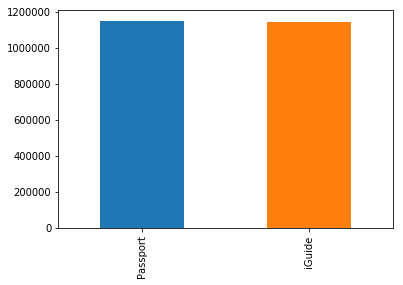

In [5]:
print(campaign_df.PLATFORM.value_counts())
campaign_df.PLATFORM.value_counts().plot(kind='bar')

Banner - B                1143198
Half Banner Moto - ABM     874792
Half Banner - AB           277389
Name: AD_TYPE_DESCRIPTION, dtype: int64


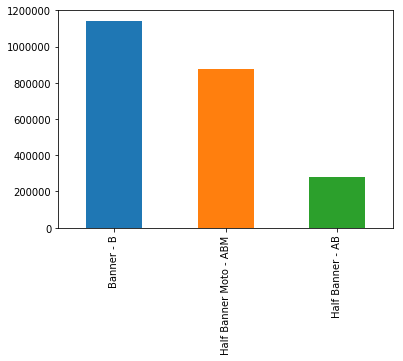

In [6]:
print(campaign_df.AD_TYPE_DESCRIPTION.value_counts())
campaign_df.AD_TYPE_DESCRIPTION.value_counts().plot(kind='bar')

In [7]:
campaign_df[['MASTER_DEAL_NUMBER','CAMPAIGN_ID','PROGRAM_ID']].groupby('MASTER_DEAL_NUMBER').count()

,CAMPAIGN_ID,PROGRAM_ID
MASTER_DEAL_NUMBER,,
Q244350-3,3986,3986
Q244605-2,18260,2803
Q244661-9,18947,3024
Q244927-3,19141,3056
Q244931-5,10946,1735
Q244992-2,4183,4183
Q245047-0,688,244
Q245147-3,8022,8022
Q245312-3,20708,4625


In [17]:
# campaign_df['EFFECTIVE_DATE_ONLY']=[str(d.date) for d in campaign_df['EFFECTIVE_DATE']]
campaign_df['EFFECTIVE_DATE_ONLY'] = campaign_df['EFFECTIVE_DATE'].dt.normalize()
campaign_df.head(10)

,CAMPAIGN_ID,PLATFORM,EFFECTIVE_DATE,DESCRIPTION,CAMPAIGN,ADVERTISER,FEED_TYPE,ATX_AD_ID,EXPIRED_DATE,PROGRAM_ID,...,VODAd,VODType,goto_designator,icon_id,MASTER_DEAL_NUMBER,DEAL_NUMBER,TIME_ZONE,REGION_ID,EFFECTIVE_DATE_ONLY,EXPIRED_DATE_ONLY
0,36348,iGuide,2018-11-02 10:00:00,DirectVid - Direct to Video IGuide and Passport,AddictHope,InfoWork Direct,House Feed,50774,2018-11-02 10:59:59,NaN,...,yes,Launch,VODClip,56.0,None,Q248242-0,ET,1288.0,2018-11-02,2018-11-02
1,15663655,iGuide,2018-07-22 19:00:00,Remind - Standard Banner with Program Link,SummerMoviesECP,Lifetime Cable Network,Two Feed,51664,2018-07-22 19:59:59,11002240.0,...,no,None,None,NaN,None,Q246572-3,ET,1516.0,2018-07-22,2018-07-22
2,15545473,iGuide,2018-06-18 05:00:00,SiG - Standard i-Guide,LungCancerLegal,Cedar Tree Media,House Feed,45406,2018-06-18 05:59:59,NaN,...,no,None,None,NaN,None,Q247158-3,ET,634.0,2018-06-18,2018-06-18
3,15590806,iGuide,2018-06-24 13:00:00,Remind - Standard Banner with Program Link,TheAffairS4 MT,"Showtime Networks, Inc.",Two Feed,51486,2018-06-24 13:59:59,438786.0,...,no,None,None,NaN,None,Q247109-2,MT,2921.0,2018-06-24,2018-06-24
4,15524216,iGuide,2018-06-09 13:00:00,Remind - Standard Banner with Program Link,Boxing PT,"Showtime Networks, Inc.",Live,51380,2018-06-09 13:59:59,438906.0,...,no,None,None,NaN,None,Q247110-2,None,2591.0,2018-06-09,2018-06-09
5,15719931,iGuide,2018-08-12 20:00:00,Remind - Standard Banner with Program Link,ClawsFinale ECP,Turner Network Television,Two Feed,51777,2018-08-12 20:59:59,11067105.0,...,no,None,None,NaN,None,Q247836-0,ET,1918.0,2018-08-12,2018-08-12
6,144809,iGuide,2018-12-04 16:00:00,WN Linear - Direct launch to Channel,25DaysXmas MT,FREEFORM,Two Feed,52636,2018-12-04 16:59:59,1239395.0,...,no,None,None,NaN,None,Q247754-5,MT,774.0,2018-12-04,2018-12-04
7,27309,iGuide,2018-10-20 12:00:00,WN Linear - Direct launch to Channel,CollegeFtbll EC,Fox Networks Group,Live,52355,2018-10-20 12:59:59,1445983.0,...,no,Launch,Network,56.0,None,Q247415-4,ET,1614.0,2018-10-20,2018-10-20
8,188529,iGuide,2018-12-23 16:00:00,Remind - Standard Banner with Program Link,BerlinStatioMT,Studio 3 Partners (Epix),Two Feed,52612,2018-12-23 16:59:59,11444563.0,...,no,None,None,NaN,None,Q248169-9,MT,1740.0,2018-12-23,2018-12-23
9,110593,iGuide,2018-12-04 09:00:00,DirectVid - Direct to Video IGuide and Passport,Tax Solutions,InfoWork Direct,House Feed,50773,2018-12-04 09:59:59,NaN,...,yes,Launch,VODClip,56.0,None,Q248240-0,ET,714.0,2018-12-04,2018-12-04


In [12]:
campaign_df[['EFFECTIVE_DATE_ONLY','CAMPAIGN_ID','PROGRAM_ID']].groupby('EFFECTIVE_DATE_ONLY').count()

,CAMPAIGN_ID,PROGRAM_ID
EFFECTIVE_DATE_ONLY,,
2018-01-01,7100,3597
2018-01-02,5345,3036
2018-01-03,4735,2403
2018-01-04,5405,2245
2018-01-05,3167,0
2018-01-06,3163,0
2018-01-07,4129,1218
2018-01-08,3959,801
2018-01-09,6114,2933


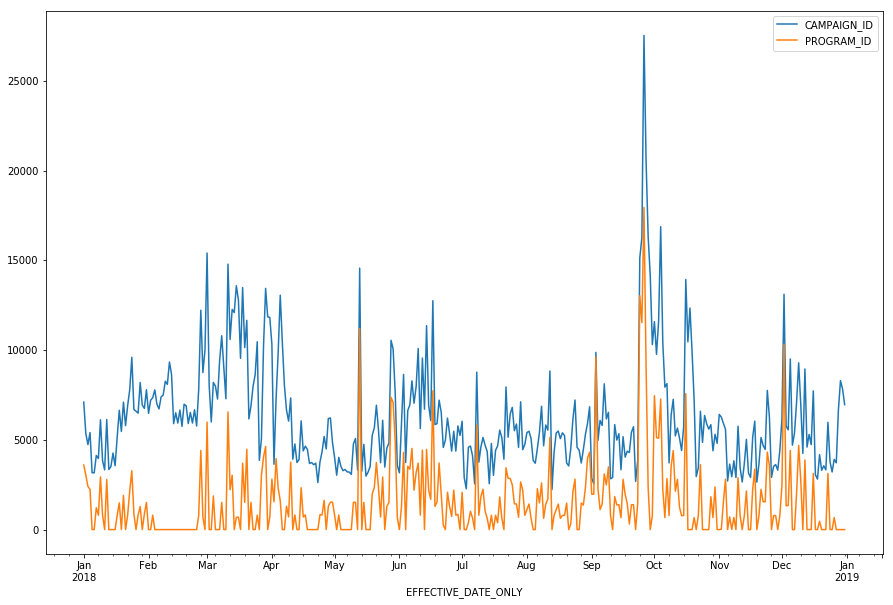

In [15]:
campaign_df[['EFFECTIVE_DATE_ONLY','CAMPAIGN_ID','PROGRAM_ID']].groupby('EFFECTIVE_DATE_ONLY').count()\
.plot(kind='line',figsize=(15,10))

In [18]:
# campaign_df['EFFECTIVE_DATE_ONLY']=[str(d.date) for d in campaign_df['EFFECTIVE_DATE']]
campaign_df['ORDER_START_ONLY'] = campaign_df['ORDER_START_DATE'].dt.normalize()
campaign_df.head(10)

,CAMPAIGN_ID,PLATFORM,EFFECTIVE_DATE,DESCRIPTION,CAMPAIGN,ADVERTISER,FEED_TYPE,ATX_AD_ID,EXPIRED_DATE,PROGRAM_ID,...,VODType,goto_designator,icon_id,MASTER_DEAL_NUMBER,DEAL_NUMBER,TIME_ZONE,REGION_ID,EFFECTIVE_DATE_ONLY,EXPIRED_DATE_ONLY,ORDER_START_ONLY
0,36348,iGuide,2018-11-02 10:00:00,DirectVid - Direct to Video IGuide and Passport,AddictHope,InfoWork Direct,House Feed,50774,2018-11-02 10:59:59,NaN,...,Launch,VODClip,56.0,None,Q248242-0,ET,1288.0,2018-11-02,2018-11-02,2018-10-01
1,15663655,iGuide,2018-07-22 19:00:00,Remind - Standard Banner with Program Link,SummerMoviesECP,Lifetime Cable Network,Two Feed,51664,2018-07-22 19:59:59,11002240.0,...,None,None,NaN,None,Q246572-3,ET,1516.0,2018-07-22,2018-07-22,2018-06-10
2,15545473,iGuide,2018-06-18 05:00:00,SiG - Standard i-Guide,LungCancerLegal,Cedar Tree Media,House Feed,45406,2018-06-18 05:59:59,NaN,...,None,None,NaN,None,Q247158-3,ET,634.0,2018-06-18,2018-06-18,2018-05-30
3,15590806,iGuide,2018-06-24 13:00:00,Remind - Standard Banner with Program Link,TheAffairS4 MT,"Showtime Networks, Inc.",Two Feed,51486,2018-06-24 13:59:59,438786.0,...,None,None,NaN,None,Q247109-2,MT,2921.0,2018-06-24,2018-06-24,2018-06-17
4,15524216,iGuide,2018-06-09 13:00:00,Remind - Standard Banner with Program Link,Boxing PT,"Showtime Networks, Inc.",Live,51380,2018-06-09 13:59:59,438906.0,...,None,None,NaN,None,Q247110-2,None,2591.0,2018-06-09,2018-06-09,2018-06-09
5,15719931,iGuide,2018-08-12 20:00:00,Remind - Standard Banner with Program Link,ClawsFinale ECP,Turner Network Television,Two Feed,51777,2018-08-12 20:59:59,11067105.0,...,None,None,NaN,None,Q247836-0,ET,1918.0,2018-08-12,2018-08-12,2018-08-12
6,144809,iGuide,2018-12-04 16:00:00,WN Linear - Direct launch to Channel,25DaysXmas MT,FREEFORM,Two Feed,52636,2018-12-04 16:59:59,1239395.0,...,None,None,NaN,None,Q247754-5,MT,774.0,2018-12-04,2018-12-04,2018-12-01
7,27309,iGuide,2018-10-20 12:00:00,WN Linear - Direct launch to Channel,CollegeFtbll EC,Fox Networks Group,Live,52355,2018-10-20 12:59:59,1445983.0,...,Launch,Network,56.0,None,Q247415-4,ET,1614.0,2018-10-20,2018-10-20,2018-09-08
8,188529,iGuide,2018-12-23 16:00:00,Remind - Standard Banner with Program Link,BerlinStatioMT,Studio 3 Partners (Epix),Two Feed,52612,2018-12-23 16:59:59,11444563.0,...,None,None,NaN,None,Q248169-9,MT,1740.0,2018-12-23,2018-12-23,2018-12-02
9,110593,iGuide,2018-12-04 09:00:00,DirectVid - Direct to Video IGuide and Passport,Tax Solutions,InfoWork Direct,House Feed,50773,2018-12-04 09:59:59,NaN,...,Launch,VODClip,56.0,None,Q248240-0,ET,714.0,2018-12-04,2018-12-04,2018-10-01


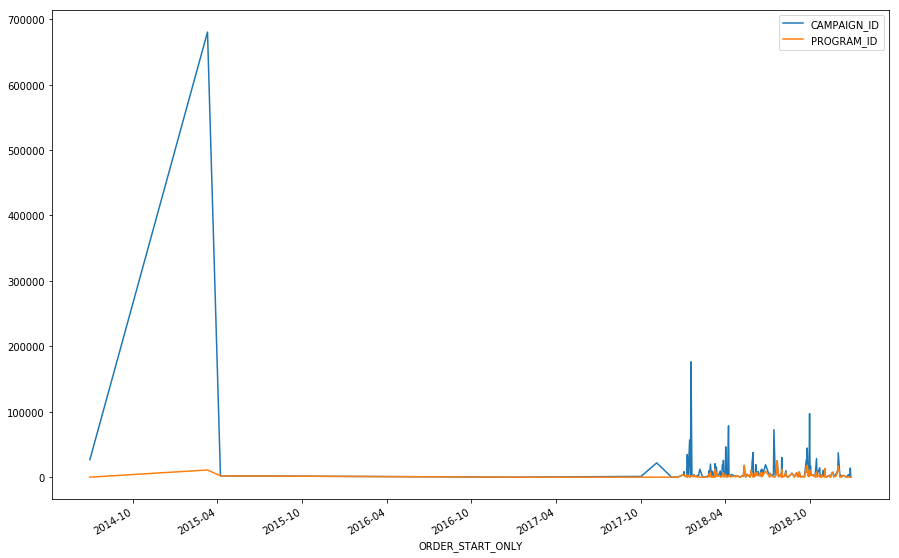

In [24]:
campaign_df[['ORDER_START_ONLY','CAMPAIGN_ID','PROGRAM_ID']].groupby('ORDER_START_ONLY').count()\
.plot(kind='line',figsize=(15,10))

In [25]:
campaign_df['ORDER_CAMPAIGN_DIFF'] = campaign_df['EFFECTIVE_DATE_ONLY']-campaign_df['ORDER_START_ONLY']

In [39]:
campaign_df\
[['CAMPAIGN_ID','CAMPAIGN','DESCRIPTION','EFFECTIVE_DATE_ONLY','ORDER_START_ONLY','ORDER_CAMPAIGN_DIFF']]\
.sort_values('ORDER_CAMPAIGN_DIFF',ascending=False)

,CAMPAIGN_ID,CAMPAIGN,DESCRIPTION,EFFECTIVE_DATE_ONLY,ORDER_START_ONLY,ORDER_CAMPAIGN_DIFF
297826,194821,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
607501,194820,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
364390,194387,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
555830,200121,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
66284,194392,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
577105,194201,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
247701,195128,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
305947,195129,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
107616,195481,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days
472894,195100,In House Info,SiG - Standard i-Guide,2018-12-31,2014-06-30,1645 days


In [62]:
campaign_notnullprog_df = campaign_df[(campaign_df.ORDER_START_ONLY> '2017-10-31') & (~np.isnan(campaign_df.PROGRAM_ID))]\
[['CAMPAIGN_ID','CAMPAIGN','DESCRIPTION','EFFECTIVE_DATE_ONLY','PROGRAM_ID','ORDER_START_ONLY','ORDER_CAMPAIGN_DIFF']]\
.sort_values('PROGRAM_ID',ascending=True)


In [64]:
campaign_notnullprog_df.head()

,CAMPAIGN_ID,CAMPAIGN,DESCRIPTION,EFFECTIVE_DATE_ONLY,PROGRAM_ID,ORDER_START_ONLY,ORDER_CAMPAIGN_DIFF
1296858,15491883,Fourth Est ECP,Remind - Standard Banner with Program Link,2018-05-27,85691.0,2018-05-27,0 days
1419451,15491807,Fourth Est ECP,Remind - Standard Banner with Program Link,2018-05-27,85691.0,2018-05-27,0 days
1401180,15492542,Fourth Est ECP,Remind - Standard Banner with Program Link,2018-05-27,85691.0,2018-05-27,0 days
1349473,15491877,Fourth Est ECP,Remind - Standard Banner with Program Link,2018-05-27,85691.0,2018-05-27,0 days
1585637,15492000,Fourth Est ECP,Remind - Standard Banner with Program Link,2018-05-27,85691.0,2018-05-27,0 days


In [72]:
campaign_notnullprog_df[['CAMPAIGN_ID','PROGRAM_ID']].groupby('PROGRAM_ID').count()

,CAMPAIGN_ID
PROGRAM_ID,
85691.0,1274
85693.0,1052
85695.0,1050
92477.0,684
148422.0,1288
175876.0,644
203930.0,2068
203974.0,624
217588.0,684


In [80]:
campaign_df[['CAMPAIGN_ID','PROGRAM_ID']].groupby('PROGRAM_ID').count().sort_values('CAMPAIGN_ID',ascending=False)

,CAMPAIGN_ID
PROGRAM_ID,
0.0,10985
10761882.0,7950
1732796.0,4389
529642.0,3822
13552457.0,3750
10591337.0,3626
12298358.0,3126
16256008.0,3125
8811228.0,3125
